In [200]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import Draw
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
import mols2grid
import useful_rdkit_utils as uru
from ipywidgets import interact

In [466]:
## Steps to perform R-group decomposition:
## 1. load the csv file with smiles string of compound and given tox data you want to analyse
## 2. converting smiles to molecular format for rdkit to process
## 3. performing fingerprinting on smiles for similarity
## 4. perform cluster analysis
## 5. defining a core structure based on one of the cluster molecules. Marvin sketch file can be used for input
## 6. Performing R group decompositon on defined cluster
## 7. Visualizing the molecules and various R groups and saving the R groups in a csv file to look at the smiles

In [470]:
# file name needs to be replaced with the assay data you want to analyse
df = pd.read_csv("SMiLES-cellvaibility.csv", names=["SMILES", "axioms_ld20_cellviability"])

In [472]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

In [473]:
df['fp'] = df.mol.apply(uru.mol2morgan_fp)

[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerator
[16:21:46] DEPRECATION WARNING: please use MorganGenerat

In [492]:
#cluster analysis according to the similarity calculated above. Cutoff can be changes to view different clusters
df['cluster'] = uru.taylor_butina_clustering(df.fp.values, cutoff=0.45)

In [493]:
# this prints the id of clusters and how many molecules are present in the same cluster
print(df.cluster.value_counts())

0     341
1     109
3      61
10     16
4       7
6       4
2       4
7       3
11      2
9       2
5       2
12      1
8       1
Name: cluster, dtype: int64


In [494]:
# visualizing molecular structures of clusters. Can change the id of cluster from 0 to 1,2 etc
mols2grid.display(df.query("cluster == 0"),mol_col="mol",subset=["img"])

MolGridWidget()

In [477]:
mb = """
    MJ240300                      

 22 24  0  0  0  0  0  0  0  0999 V2000
   -3.4375    2.6107    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1519    2.1982    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1519    1.3731    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4375    0.9606    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7230    1.3731    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7230    2.1982    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2661    0.1537    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4456    0.0673    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1100    0.8209    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3030    0.9923    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0480    1.7769    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2410    1.9483    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3109    1.3353    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1180    1.5068    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.3730    2.2913    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8210    2.9045    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0139    2.7330    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0332   -0.6471    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7511    0.3792    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5380    3.3461    0.0000 *   0  0  0  0  0  0  0  0  0  0  0  0
    1.0759    3.6891    0.0000 *   0  0  0  0  0  0  0  0  0  0  0  0
   -4.8664    2.6107    0.0000 *   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  8  9  1  0  0  0  0
  5  9  2  0  0  0  0
  9 10  1  0  0  0  0
 15 16  1  0  0  0  0
 16 17  2  0  0  0  0
 12 13  2  0  0  0  0
 17 12  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  7  8  2  0  0  0  0
  4  7  1  0  0  0  0
  5  6  1  0  0  0  0
  6  1  2  0  0  0  0
 10 11  1  0  0  0  0
 11 12  1  0  0  0  0
  8 18  1  0  0  0  0
 10 19  2  0  0  0  0
 13 14  1  0  0  0  0
 14 15  2  0  0  0  0
 16 21  1  0  0  0  0
 17 20  1  0  0  0  0
  2 22  1  0  0  0  0
M  END
"""

In [495]:
core = Chem.MolFromMolBlock(mb)

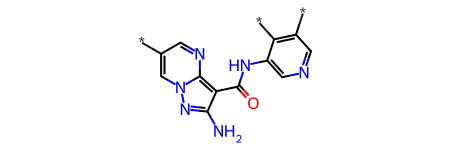

In [463]:
core

In [496]:
# this defined data frame for the cluster analysis and if we want to analyse different cluster,the id can be changed from 0 to 1 etc
df_0 = df.query("cluster == 0").copy()

In [497]:
df_0['index'] = range(0,len(df_0))

In [498]:
# performing R group decomposition according to the core structure defined above for all the molecules in cluster 0
# if asSmiles is True, it will display smiles.To view molecular structure, make asSmiles=false
rgd,failed = rdRGroupDecomposition.RGroupDecompose([core],df_0.mol.values,asRows=False,asSmiles=False)

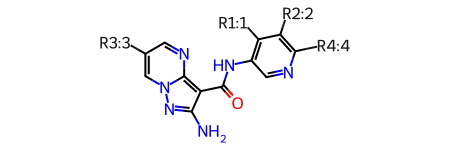

In [499]:
rgd['Core'][0]

,Mol,R1,R2,R3,R4
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,
...,...,...,...,...,...
336,,,,,
337,,,,,
338,,,,,
339,,,,,

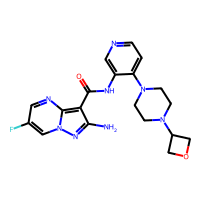
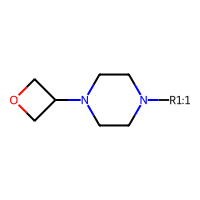
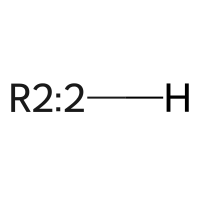
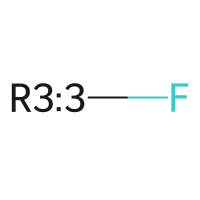
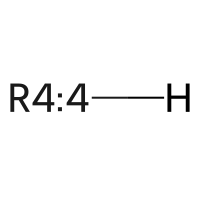
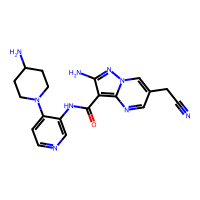
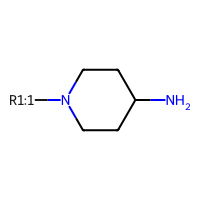
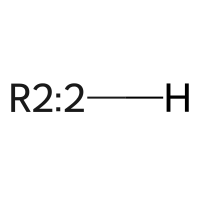
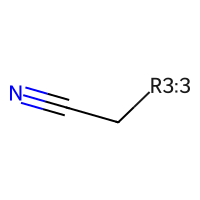
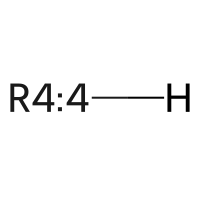
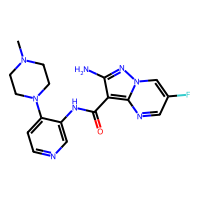
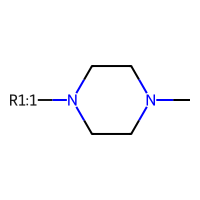
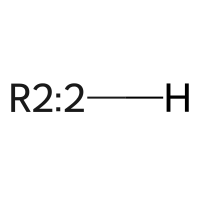
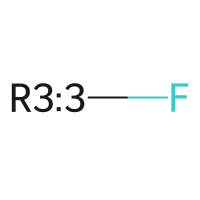
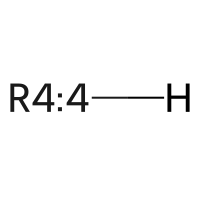
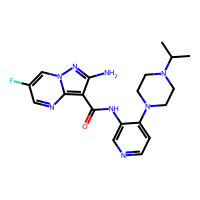
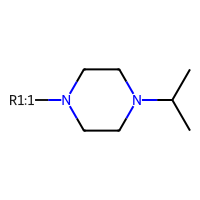
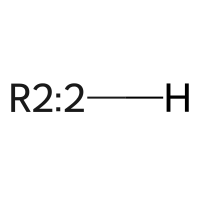
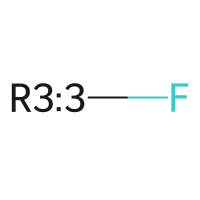
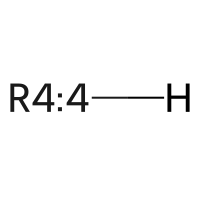
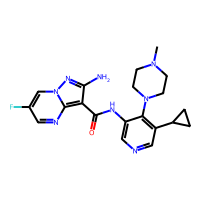
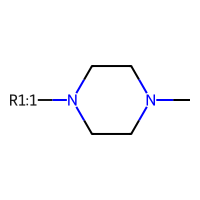
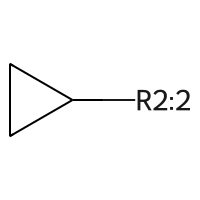
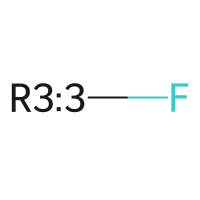
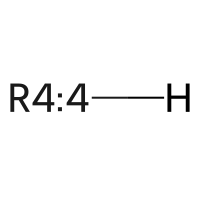
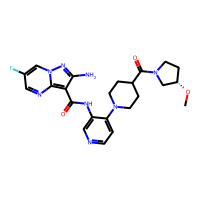
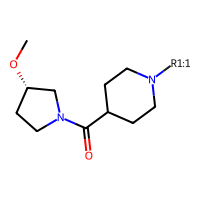
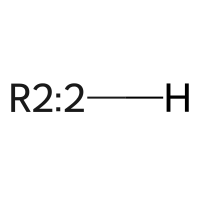
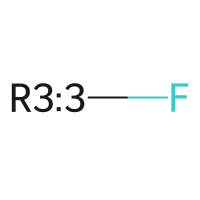
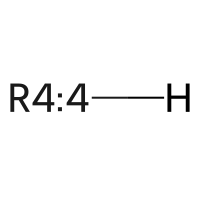
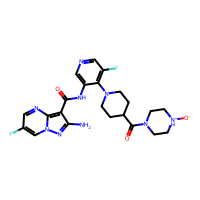
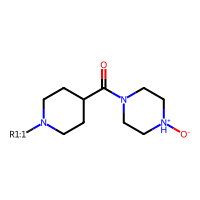
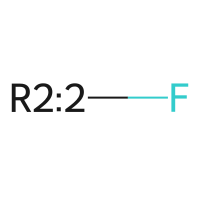
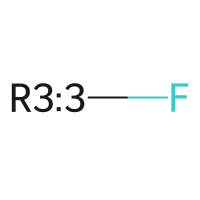
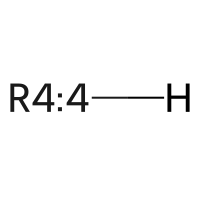
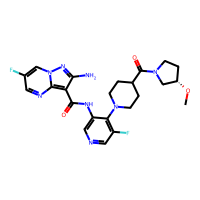
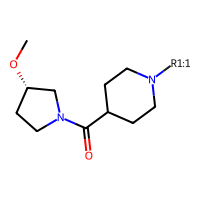
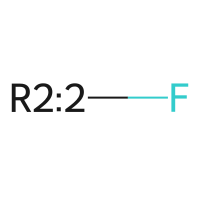
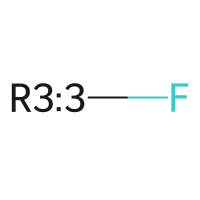
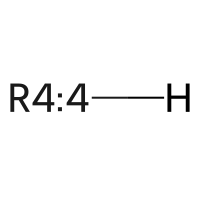
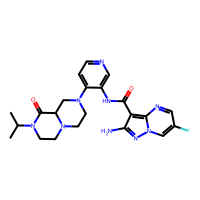
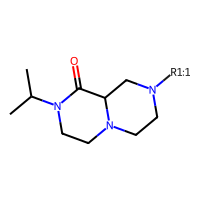
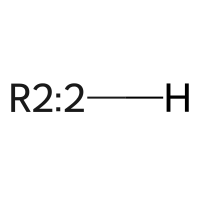
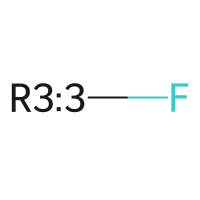
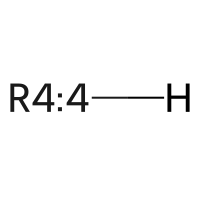
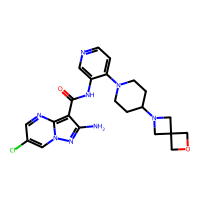
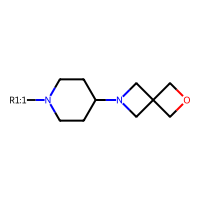
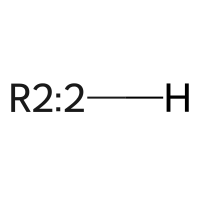
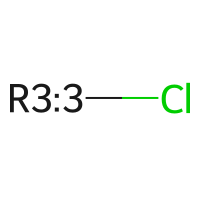
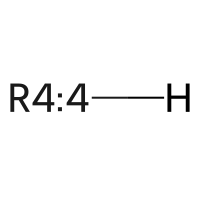

In [500]:
# visualizing the molecules and respective R groups
PandasTools.RGroupDecompositionToFrame(rgd,[df_0.mol.values[i] for i in range(len(df_0.mol.values)) if i not in failed],)
                                                                                                          

In [501]:
# gives ouput for identified number of R groups. This could be more than we defined in out initial structure
r_groups = [x for x in rgd.keys() if x != "Core"]
r_groups

['R1', 'R2', 'R3', 'R4']

In [503]:
for r in sorted(r_groups):
    df_0[r] = rgd[r]
    df_0[r] = df_0[r].apply(Chem.MolToSmiles)

In [504]:
@interact(rg=r_groups)
def display_rgroups(rg):
    vc_df = uru.value_counts_df(df_0,rg)
    return mols2grid.display(vc_df,smiles_col=rg,subset=["img","count"])

interactive(children=(Dropdown(description='rg', options=('R1', 'R2', 'R3', 'R4'), value='R1'), Output()), _do…

In [ ]:
## THe above window allows to save the smiles for all the identified R groups in .csv format. I have attached the file along
## Next we will save the smiles data for the R groups of respective compounds along with the tox data
## Csv files are provided as output containg the smiles for R groups and respective tox data

In [455]:
rgd_df = PandasTools.RGroupDecompositionToFrame(rgd, [df_0.mol.values[i] for i in range(len(df_0.mol.values)) if i not in failed])

In [456]:
rgroup_df = PandasTools.RGroupDecompositionToFrame(
    rgd, 
    [df_0.mol.values[i] for i in range(len(df_0.mol.values)) if i not in failed]
)

In [457]:
# the name of tox assay needs to be changes while analysing different assays in this section
rgroup_df['Original_SMILES'] = [df_0.SMILES.values[i] for i in range(len(df_0.SMILES)) if i not in failed]
rgroup_df['axioms_ld20_cellviability'] = [df_0.axioms_ld20_cellviability.values[i] for i in range(len(df_0.axioms_ld20_cellviability)) if i not in failed]

In [458]:
# change the name of assay here as well
columns_order = ['Original_SMILES', 'R1', 'R2', 'R3', 'R4', 'axioms_ld20_cellviability']
rgroup_df = rgroup_df[[col for col in columns_order if col in rgroup_df.columns]]

In [459]:
output_file = "rgroup_decomposition_results-Cellviability.csv"
rgroup_df.to_csv(output_file, index=False)

In [ ]:
## Next we are creating a 2D SAR Matrix to visualize the tox data as a function of combination of different R groups
## The final output of this analysis is giving us html view of R1-R2 combination and respective cell-viability assay data
## This image can be easily used to see the R1/R2 groups or combinations of R1 and R2 that are more toxic

In [364]:
def groups_to_df(groups,mols,include_core=False,redraw_sidechains=False):
    """ converts the results of an r-group decomposition into a humanly useful
    DataFrame
    
    """
    cols = ['Mol']+list(groups.keys())
    if redraw_sidechains:
        for k,vl in groups.items():
            if k=='Core':
                continue
            for i,v in enumerate(vl):
                vl[i] = Chem.RemoveHs(v)
                rdDepictor.Compute2DCoords(vl[i])

    
    if not include_core:
        cols.remove('Core')
        del groups['Core']
    groups['Mol'] = mols
    frame = pd.DataFrame(groups,columns=cols)
    PandasTools.ChangeMoleculeRendering(frame)
    return frame

,Mol,R1,R3
0,,C1OCC1N1CCN([*:1])CC1,F[*:3]
1,,CC(C)N1CCN([*:1])CC1,F[*:3]
2,,c1cn([*:1])cn1,F[*:3]
3,,C1C[C@@H](N2CCN([*:1])CC2)CO1,F[*:3]
4,,C1CC(N2CCN([*:1])CC2)CCO1,F[*:3]

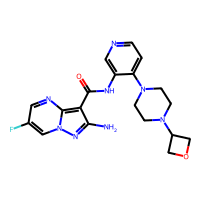
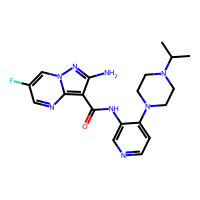
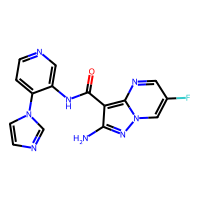
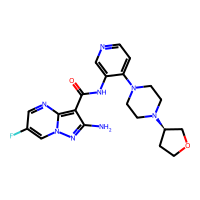
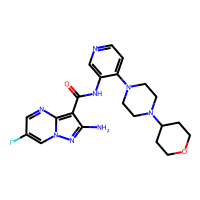

In [365]:
ms = [y for x,y in enumerate(df_0.mol.values) if x not in failed]
res = groups_to_df(rgd,ms,include_core=False)
res.head()

In [366]:
## Running this again with asSmiles=false to see the structures in the matrix
rgd,failed = rdRGroupDecomposition.RGroupDecompose([core],df_0.mol.values,asSmiles=False,asRows=False) 

In [367]:
from collections import Counter
from IPython.display import HTML
import base64
def mol_to_img(m):
    dm = Draw.PrepareMolForDrawing(m)
    d2d = Draw.MolDraw2DCairo(250,200)
    dopts = d2d.drawOptions()
    dopts.dummiesAreAttachments=True
    d2d.DrawMolecule(dm)
    d2d.FinishDrawing()
    png_data = d2d.GetDrawingText() 
    png_data = base64.encodebytes(png_data)
    html ='<img src="data:image/png;base64,%s">'%png_data.decode()
    return html

def run_groups(groups,unmatched,mols,values,r1_label='R1',r2_label='R3',threshold=1):
    # generate SAR matrix
    # This matrix is very powerful as we can simplyt change the R1/R2/R3/R4 and see that 
    #what combination is least toxic
    
    # generate SMILES for each of the R-groups and map those 
    # to the R-group's molecule objects:
    r1_smiles = [Chem.MolToSmiles(x) for x in groups[r1_label]]
    r2_smiles = [Chem.MolToSmiles(x) for x in groups[r2_label]]
    r1_lookup = dict(zip(r1_smiles,groups[r1_label]))
    r2_lookup = dict(zip(r2_smiles,groups[r2_label]))
    
    # all_r1s and all_r2s map R indices to the corresponding SMILES:
    all_r1s = dict([(y,x) for x,y in enumerate(r1_lookup.keys())])
    all_r2s = dict([(y,x) for x,y in enumerate(r2_lookup.keys())])
    
    # labelled_mols will contain 3-tuples:
    #   (molecule_index,R1_index,R2_index)
    labelled_mols = []
    residx = 0
    for i,m in enumerate(mols):
        if i in unmatched:
            continue
        r1_idx = all_r1s[r1_smiles[residx]]
        r2_idx = all_r2s[r2_smiles[residx]]
        residx += 1
        labelled_mols.append((i,r1_idx,r2_idx))
        
    # We only keep r groups that appear at least `threshold times in the full list:
    c1 = Counter()
    c2 = Counter()
    for idx,i,j in labelled_mols:
        c1[i] += 1
        c2[j] += 1
    freq1 = [x for x,y in c1.items() if y>=threshold]
    freq2 = [x for x,y in c2.items() if y>=threshold]
    reverse_r1s = dict([(y,x) for x,y in all_r1s.items()])
    reverse_r2s = dict([(y,x) for x,y in all_r2s.items()])
    freq_r1s = [reverse_r1s[i] for i in freq1]
    freq_r2s = [reverse_r2s[i] for i in freq2]
    n_r1 = len(freq1)
    n_r2 = len(freq2)
    
    # now construct a matrix 
    matrix = [None]*(n_r1*n_r2)
    matrix = np.reshape(matrix,(n_r1,n_r2))
    for idx,i,j in labelled_mols:
        if i not in freq1 or j not in freq2:
            continue
        r1idx = freq1.index(i)
        r2idx = freq2.index(j)
        matrix[r1idx,r2idx] = idx
        
    # now create the html from that
    html = "<table>"
    ths = "".join("<th>%s</th>"%mol_to_img(r2_lookup[x]) for x in freq_r2s)
    html += f"<tr><td></td>{ths}</tr>"
    for i1,x in enumerate(freq_r1s):
        img = mol_to_img(r1_lookup[x])
        row = f"<tr><td>{img}</td>"
        for i2,y in enumerate(freq_r2s):
            if matrix[i1,i2] is not None:
                elem = matrix[i1,i2]
                elem = values.iloc[elem]
            else:
                elem = ''
            row += f'<td>{elem}</td>'    
        row += "</tr>"
        html += row
    html += "</table>"
    return html

In [368]:
# calling values from data frame to view the matrix
html = run_groups(rgd,failed,df_0.mol.values,df_0.axioms_ld20_cellviability)
HTML(html)